Load all the libraries and set colors

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

cmap = 'spring'

Load the data files and update metadata

In [2]:
fin_surfdata = xr.open_dataset('CLM5_current_surf_deg025.nc')
fin_pasturedata = xr.open_dataset('CLM5_current_luhpasture_deg025.nc')
fin_otherdata = xr.open_dataset('CLM5_current_luhother_deg025.nc')
fin_forestdata = xr.open_dataset('CLM5_current_luhforest_deg025.nc')

fin_surfdata['lon'] = fin_surfdata.lon * 0.25 - 180. + 1./8.
fin_surfdata['lat'] = fin_surfdata.lat * 0.25 - 90. + 1./8.

fin_pasturedata['lon'] = fin_pasturedata.lon * 0.25 - 180. + 1./8.
fin_pasturedata['lat'] = fin_pasturedata.lat * 0.25 - 90. + 1./8.

fin_otherdata['lon'] = fin_otherdata.lon * 0.25 - 180. + 1./8.
fin_otherdata['lat'] = fin_otherdata.lat * 0.25 - 90. + 1./8.

fin_forestdata['lon'] = fin_forestdata.lon * 0.25 - 180. + 1./8.
fin_forestdata['lat'] = fin_forestdata.lat * 0.25 - 90. + 1./8.

fin_surfdata['PCT_NAT_PFT'] = fin_surfdata['PCT_NAT_PFT'].assign_attrs({'long_name':'PFT percentage, CLM5_current_surf_deg025.nc'})


Load static data for land/ocean mask and forest/non-forest mask

In [3]:
luh2_staticdata = xr.open_dataset('../staticData_quarterdeg.nc')
landoceanmask = (1.-luh2_staticdata.icwtr) / (1.-luh2_staticdata.icwtr)

Calculate the bare-ground fraction from the surface data file and remove the bare-ground fraction from the forest, pasture, and other PFT datasets, so that each of them sum to 100% of the non-bare-ground fraction.

In [4]:
bareground_percent = fin_surfdata.PCT_NAT_PFT.isel(natpft=0) * landoceanmask

forest_pft_percent = fin_forestdata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_forestdata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask
pasture_pft_percent = fin_pasturedata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_pasturedata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask
other_pft_percent = fin_otherdata.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin_otherdata.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask

Calculate the primary and secondary PFT fractions as the forest- and nonforest-weighted averages of the forest and other PFT datasets.

In [5]:
primary_secondary_percent = luh2_staticdata.fstnf * forest_pft_percent + (1.- luh2_staticdata.fstnf) * other_pft_percent

Make a map of the bare ground fraction

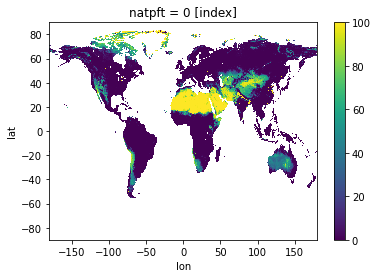

In [6]:
bareground_percent.plot()

Make a map of the primary and secondary land PFT fractions

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_66593/4173017881.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


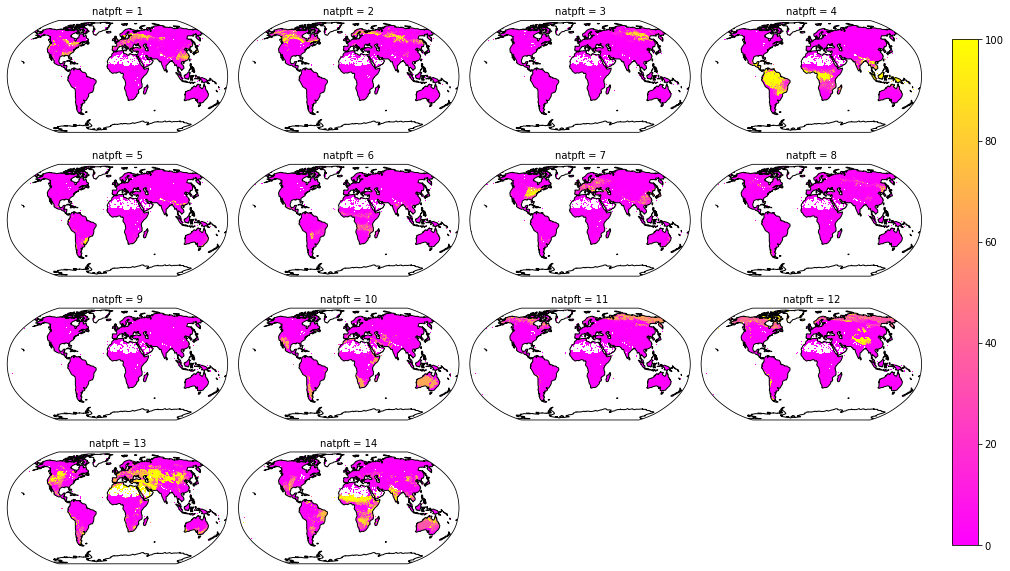

In [7]:
fg = primary_secondary_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


Make a map of the pasture land PFT fractions

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_66593/4172619223.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


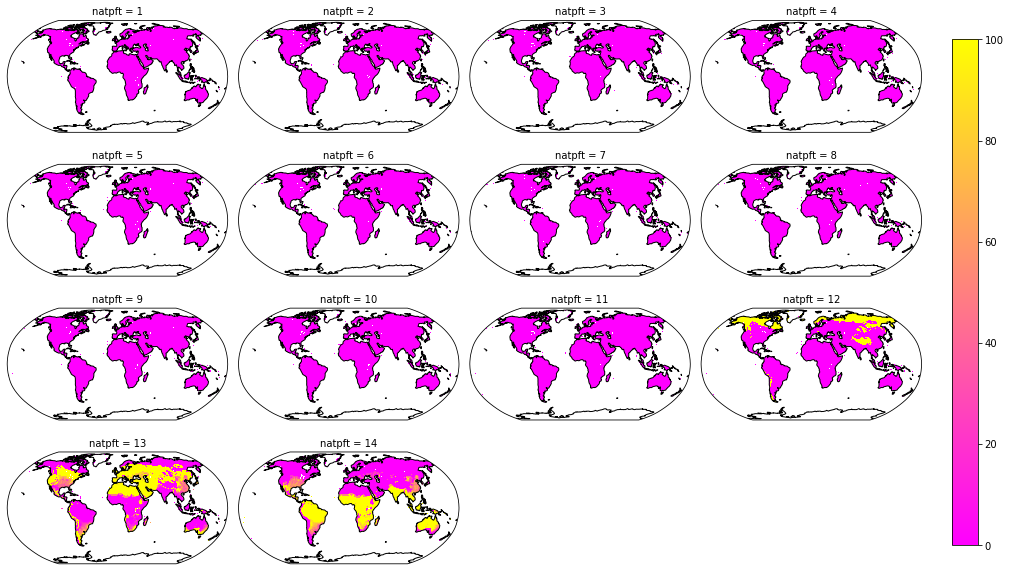

In [8]:
fg = pasture_pft_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


Make a map of the rangeland PFT fractions

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_66593/1479862244.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


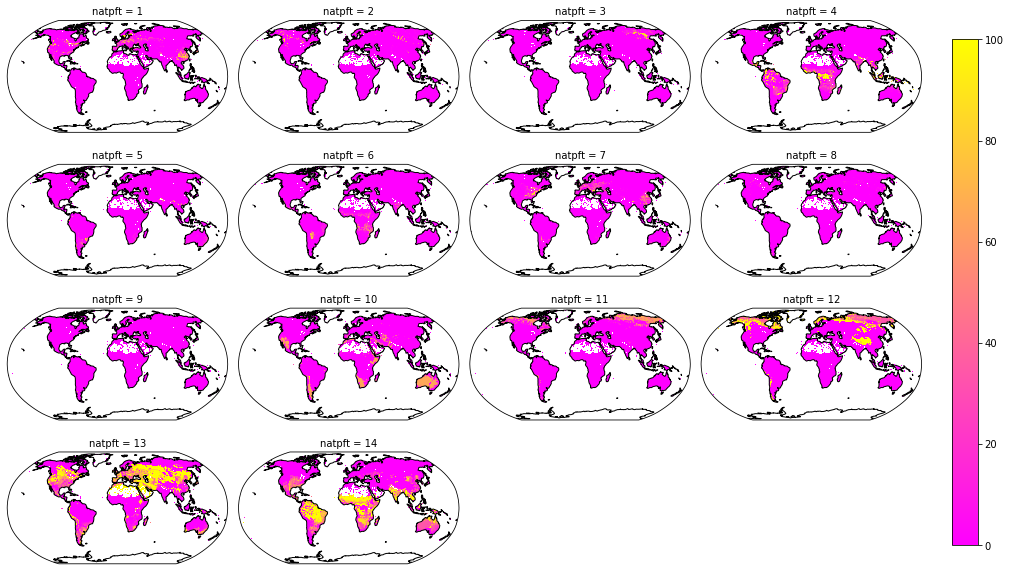

In [9]:
fg = other_pft_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 
    

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


Ensure that the primary and secondary sum to 100% (i.e. it is the fraction of non-bare-ground area)

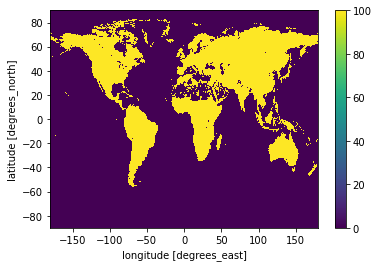

In [10]:
primary_secondary_percent.sum(dim='natpft').plot()

Ensure that the rangeland sum to 100% (i.e. it is the fraction of non-bare-ground area)

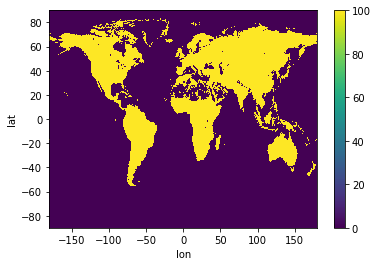

In [11]:
other_pft_percent.sum(dim='natpft').plot()